In [1]:
export MLFLOW_TRACKING_URI=http://localhost:5000

SyntaxError: invalid syntax (1345152905.py, line 1)

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import mlflow
import mlflow.keras
from mlflow.models import infer_signature

In [6]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [4]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Current Working Directory:", current_directory)

Current Working Directory: D:\SirWaqas


In [5]:
# Full path to the ZIP file
zip_file_path = r'D:\SirWaqas\forest+fires.zip'

# Open the ZIP file and read the CSV file directly
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('forestfires.csv') as csv_file:
        df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
df.shape

(517, 13)

In [8]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [9]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Displaying the count of missing values for each column
missing_values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
# Encode Data
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [9]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
print("Statistical Description:", df.describe())

Statistical Description:                 X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.072929    5.520111   64.046482   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    2.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    6.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    7.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
st

In [13]:
print("Data Types:", df.dtypes)

Data Types: X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'area'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

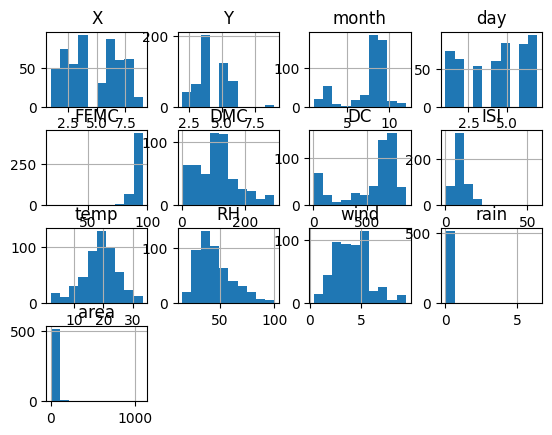

In [14]:
df.hist()

In [7]:
# Scaling numerical features
scale_columns = ['X', 'Y', 'month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data
df[scale_columns] = scaler.fit_transform(df[scale_columns])

# Displaying the first few rows of the DataFrame after scaling
scaled_head = df.head(200)
scaled_head

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.154748,0.569860,0.230531,0.357721,0.590291,0.388026,0.156400,1.334413,0.794833,-0.508426,0.772325,-0.073268,-0.044458
196,0.575701,0.569860,-1.528648,-0.125156,-1.658216,-1.590578,-1.988249,-1.387832,-2.256361,0.595754,0.995798,-0.073268,-0.030149
197,-0.289524,0.569860,0.670325,-0.125156,0.408960,0.408344,0.639400,0.039151,0.450065,-1.796637,-1.741756,-0.073268,-0.028105
198,-0.722136,-0.244001,0.670325,-1.090909,0.064430,0.291128,0.583715,-0.443828,-0.860052,0.902471,1.275141,-0.073268,-0.025274


In [8]:
scaled_head.to_csv('processed.csv')

In [9]:
X = scaled_head.drop('area', axis=1)  # Replace 'target_column' with the name of your target column.
y = scaled_head['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [10]:
# Check the shape of X_train to see how many features there are
print(X_train.shape)  # This should output something like (num_samples, num_features)

# If there are indeed 12 features, set n_features to 12
n_features = X_train.shape[1]

# Then rebuild your model with the correct number of input features
model = Sequential([
    Dense(n_features, input_dim=n_features, activation='relu'),
    Dense(n_features // 2, activation='relu'),
    Dense(n_features // 2, activation='relu'),
    Dense(1)
])

# Compile and summarize the model again
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

(140, 12)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 283 (1.11 KB)
Trainable params: 283 (1.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
mlflow.set_experiment("My MLflow")

<Experiment: artifact_location='mlflow-artifacts:/114604900249674853', creation_time=1702927187511, experiment_id='114604900249674853', last_update_time=1702927187511, lifecycle_stage='active', name='My MLflow', tags={}>

In [22]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=13)

Epoch 1/100
10/10 [==============================] - 2s 65ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 3/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 5/100
10/10 [==============================] - 0s 25ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 7/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 8/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 9/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 10/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 0.0047

In [23]:
mse_test = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.0029


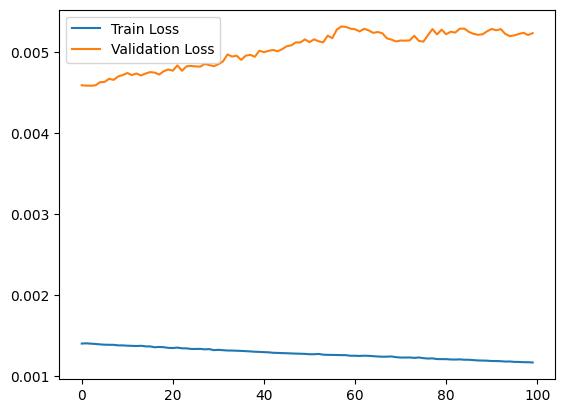

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Flatten y_pred to have the same shape as y_test
y_pred = y_pred.flatten()

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

2/2 [==============================] - 0s 6ms/step
Mean Squared Error (MSE): 0.0028741983572279643
R-squared (R²): -1.0891825604509218


In [26]:
with mlflow.start_run():
    mlflow.log_param("n_features", X.shape[1])
    mlflow.log_param("epochs", 100)
    mlflow.log_param("batch_size", 13)

    # Log the loss metric
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "My Model")

    # Convert X_train to a NumPy array if it's not already
    X_train = np.array(X_train)
    
    # Infer the model signature
    signature = infer_signature(X_train, model.predict(X_train))
    
    # Log the model
    model_info = mlflow.keras.log_model(
        model,
        artifact_path="forest_fire_prediction_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking_forest_fire_prediction_model",
    )

5/5 [==============================] - 0s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\qbada\AppData\Local\Temp\tmp9mtt5ixw\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\qbada\AppData\Local\Temp\tmp9mtt5ixw\model\data\model\assets
Registered model 'tracking_forest_fire_prediction_model' already exists. Creating a new version of this model...
2023/12/19 02:33:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking_forest_fire_prediction_model, version 4
Created version '4' of model 'tracking_forest_fire_prediction_model'.


In [27]:
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

2023/12/19 02:33:35 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


In [28]:
predictions = loaded_model.predict(X_test)

my_feature_names = scaled_head.columns

# Convert X_test validation feature data to a Pandas DataFrame
result = pd.DataFrame(X_test, columns=my_feature_names)


# Flatten y_pred to have the same shape as y_test
y_pred = y_pred.flatten()

# Add the actual classes to the DataFrame
result["actual_class"] = y_test

# Add the model predictions to the DataFrame
result["predicted_class"] = predictions

result[:4]

2/2 [==============================] - 0s 18ms/step


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,actual_class,predicted_class
119,-0.722136,-0.244001,0.230531,-0.125156,0.427093,-0.555952,-0.328214,-0.290152,0.122536,-0.508426,-0.512650,-0.073268,NaN,-0.20202,-0.196960
62,-1.154748,-1.871724,0.230531,-0.125156,0.427093,-0.555952,-0.328214,-0.290152,-0.015371,-0.569770,0.492982,-0.073268,NaN,-0.20202,-0.180702
132,-0.289524,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.428919,0.105008,0.492982,-0.073268,NaN,-0.20202,-0.184241
114,-0.722136,-0.244001,-1.968443,-1.090909,-0.461430,-1.331140,-1.938214,-1.146342,-0.532523,-1.060516,2.001430,-0.073268,NaN,-0.20202,-0.184241
